In [63]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# for charts
%matplotlib inline

# loading data set
resource_id = "bd41992a-987a-4cca-8798-fbe1cd946b07"
crime_url = f"https://data.wprdc.org/datastore/dump/{resource_id}"
crime_data = pd.read_csv(crime_url, low_memory=False)

# first look at data
print("Dataset shape:", crime_data.shape)
print("\nFirst few rows:")
crime_data.head()

Dataset shape: (72818, 20)

First few rows:


,_id,Report_Number,ReportedDate,ReportedTime,Hour,DayofWeek,ReportedMonth,NIBRS_Coded_Offense,NIBRS_Offense_Code,NIBRS_Offense_Category,NIBRS_Offense_Type,NIBRS_Crime_Against,NIBRS_Offense_Grouping,Violation,XCOORD,YCOORD,Zone,Tract,Neighborhood,Block_Address
0,1,PGHP24000024,2024-01-01,00:31,0,Monday,Jan,13A AGGRAVATED ASSAULT,13A,Assault Offenses,Aggravated Assault,Person,A,18 2718 A1 Strangulation Basic - Applying,-80.0268,40.3964,Zone 6,1919,Brookline,"2800 Block of FITZHUGH WAY Pittsburgh, PA"
1,2,PGHP24000024,2024-01-01,00:31,0,Monday,Jan,13C INTIMIDATION,13C,Assault Offenses,Intimidation,Person,A,18 2706 A1 Terroristic Threats-General,-80.0268,40.3964,Zone 6,1919,Brookline,"2800 Block of FITZHUGH WAY Pittsburgh, PA"
2,3,PGHP24000024,2024-01-01,00:31,0,Monday,Jan,90Z ALL OTHER OFFENSES,90Z,All other Offenses,All other Offenses,Group B,B,75 3733 A Fleeing or Attempting To Elude Polic...,-80.0268,40.3964,Zone 6,1919,Brookline,"2800 Block of FITZHUGH WAY Pittsburgh, PA"
3,4,PGHP24000024,2024-01-01,00:31,0,Monday,Jan,23H ALL OTHER LARCENY,23H,Larceny/Theft Offenses,All Other Larceny,Property,A,18 3921 A Theft by Unlawful Taking-Movable – L...,-80.0268,40.3964,Zone 6,1919,Brookline,"2800 Block of FITZHUGH WAY Pittsburgh, PA"
4,5,PGHP24000017,2024-01-01,00:21,0,Monday,Jan,9999 Vehicle Offense (Not NIBRS Reportable),999,Not NIBRS Reportable,Not NIBRS Reportable,Group B,B,LO 6 101 Discharge of Firearms Prohibited,-80.0243,40.4582,Zone 1,2107,Manchester,"1200 Block of COLUMBUS AVE Pittsburgh, PA"


# Introduction
* The submetric that I'm using to determine what is the best neighborhood in Pittsburgh is safety. To do this, I've decided on a data set that records the **Monthly Criminal Activity** in any given neighborhood. It includes data such as crime committed, when, locations, and offense type. And to determine which is the best neighborhood in Pittsburgh, I analyzed the data with a specific focus on which neighborhoods had the lowest reported crimes overall. Safety is a huge concern when it comes to living in a city, and so I believed it was the perfect metric to use to ascertain the best neighborhood in the city.

In [64]:
# getting a feel for the data
print("The Neighborhoods in our data:")
print(crime_data['Neighborhood'].unique())

# how crimes happened in each neighborhood
crime_counts = crime_data['Neighborhood'].value_counts()

print("Crimes by Neighborhood:")
print(crime_counts)

The Neighborhoods in our data:
['Brookline' 'Manchester' 'Point Breeze North' 'South Side Flats'
 'North Shore' 'Greenfield' 'Homewood North' 'South Side Slopes'
 'Central Business District' nan 'East Liberty' 'North Oakland'
 'Squirrel Hill South' 'East Allegheny' 'Strip District'
 'Lincoln–Lemington–Belmar' 'Shadyside' 'Carrick' 'Point Breeze'
 'Morningside' 'Allentown' 'Crafton Heights' 'Mount Washington'
 'Crawford-Roberts' 'Marshall-Shadeland' 'Central Oakland' 'Elliott'
 'Brighton Heights' 'Central Lawrenceville' 'Summer Hill' 'South Oakland'
 'Homewood South' 'Knoxville' 'Terrace Village' 'West Oakland' 'Fineview'
 'Perry South' 'Upper Lawrenceville' 'Bluff' 'Sheraden'
 'Spring Hill–City View' 'Bloomfield' 'Beechview' 'Squirrel Hill North'
 'Garfield' 'Banksville' 'Bon Air' 'Northview Heights' 'Overbrook'
 'Larimer' 'Hazelwood' 'Friendship' 'Central Northside' 'Homewood West'
 'Lower Lawrenceville' 'East Carnegie' 'Bedford Dwellings'
 'Lincoln-Lemington-Belmar' 'New Homestead' '

In [65]:
# crimes per neighborhood
crime_counts = crime_data['Neighborhood'].value_counts()

print(f"\nWe have {len(crime_counts)} neighborhoods")
print(f"Crime counts range from {crime_counts.min()} tp {crime_counts.max()}")


We have 91 neighborhoods
Crime counts range from 25 tp 7218


In [66]:
# finding out the safest neighborhoods

safest = crime_counts.sort_values()

print("Safest Neighborhoods (lowest reported crimes):")
print(safest.head(10))

Safest Neighborhoods (lowest reported crimes):
Neighborhood
Saint Clair       25
Ridgemont         33
Chartiers         38
New Homestead     54
Swisshelm Park    66
East Carnegie     78
Esplen            79
Summer Hill       83
Oakwood           88
Regent Square     97
Name: count, dtype: int64


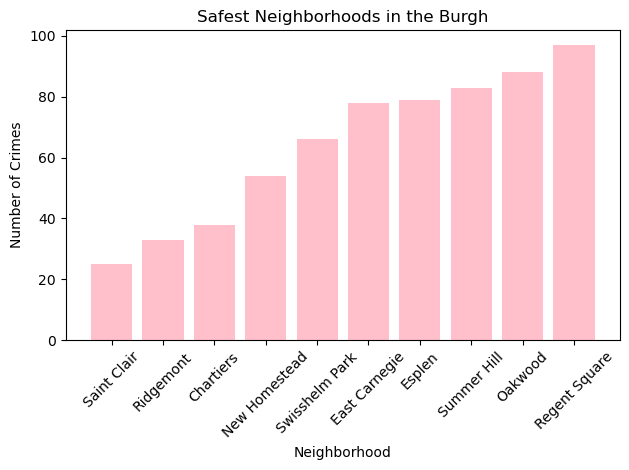

The Safest Neighborhood in Pittsburgh is: Saint Clair


In [67]:
# making a chart for the top 10 safest neighborhoods
top_s10 = safest.head(10)

# creating the chart
plt.bar(top_s10.index, top_s10.values, color='pink')
plt.title("Safest Neighborhoods in the Burgh")
plt.xlabel('Neighborhood')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"The Safest Neighborhood in Pittsburgh is: {safest.index[0]}")

In [68]:
# finding out the most dangerous neighborhoods

print("Most Dangerous Neighborhoods (highest reported crimes):")
most_dangerous = crime_counts.sort_values(ascending=False)
print(most_dangerous.head(10))

Most Dangerous Neighborhoods (highest reported crimes):
Neighborhood
Central Business District    7218
South Side Flats             4631
Carrick                      2242
Shadyside                    1993
East Allegheny               1917
East Liberty                 1913
Bloomfield                   1498
Knoxville                    1444
Mount Washington             1401
Squirrel Hill South          1352
Name: count, dtype: int64


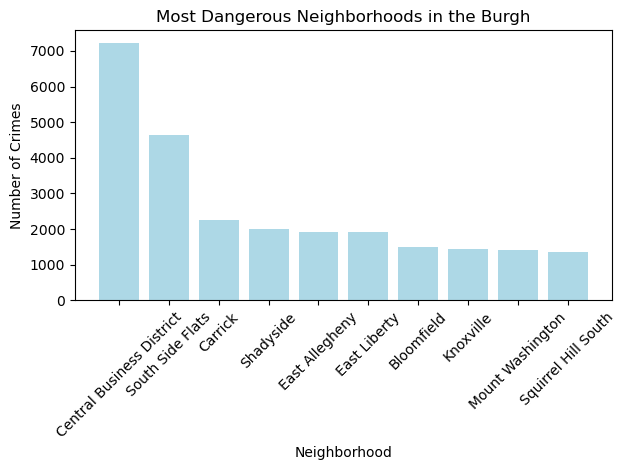

The Most Dangerous Neighborhood in Pittsburgh is: Central Business District


In [69]:
# making a chart for the top 10 most dangerous neighborhoods
top_d10 = most_dangerous.head(10)

# creating the chart
plt.bar(top_d10.index, top_d10.values, color='lightblue')
plt.title("Most Dangerous Neighborhoods in the Burgh")
plt.xlabel('Neighborhood')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"The Most Dangerous Neighborhood in Pittsburgh is: {most_dangerous.index[0]}")

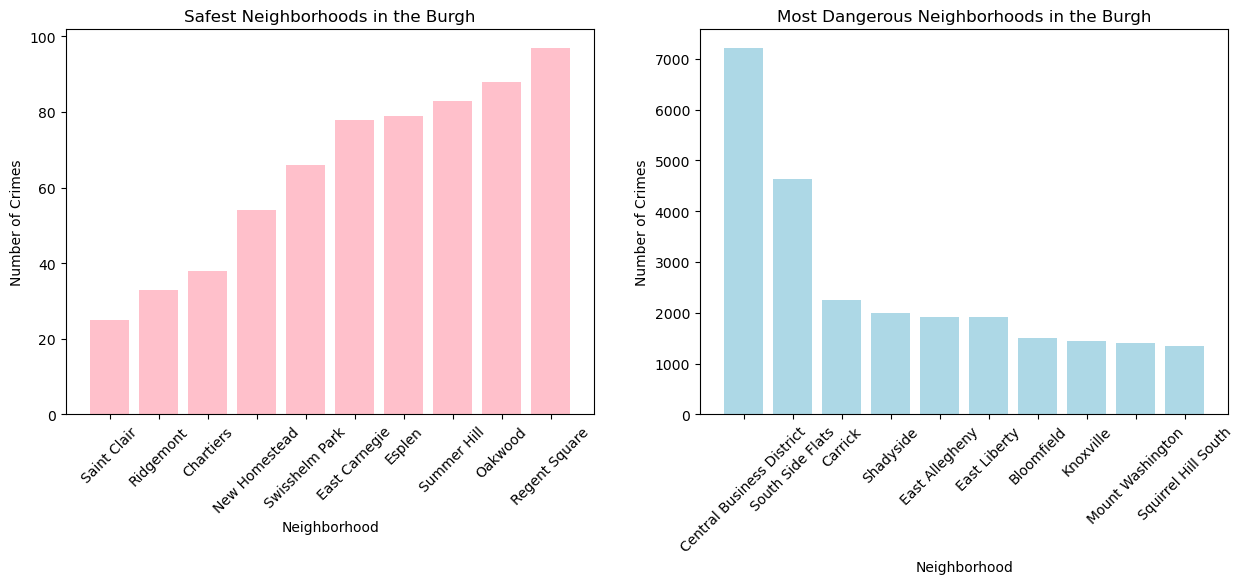


Safest Neighborhood: Saint Clair (25 crimes)
Most Dangerous Neighborhood: Central Business District (7218 crimes)


In [74]:
# having the charts side by side

fig, (left_chart, right_chart) = plt.subplots(1, 2, figsize=(15, 5))

# Left chart: safest neighborhoods
left_chart.bar(top_s10.index, top_s10.values, color='pink')
left_chart.set_title("Safest Neighborhoods in the Pittsburgh")
left_chart.set_xlabel('Neighborhood')
left_chart.set_ylabel('Number of Crimes')
plt.sca(left_chart) # sets the current axes to the left chart
plt.xticks(rotation=45)

# Right chart: most dangerous neighborhoods
right_chart.bar(top_d10.index, top_d10.values, color='lightblue')
right_chart.set_title("Most Dangerous Neighborhoods in the Pittsburgh")
right_chart.set_xlabel('Neighborhood')
right_chart.set_ylabel('Number of Crimes')
plt.sca(right_chart) # sets current saxes to the right chart
plt.xticks(rotation=45)

plt.show() # shows the graphs

# print results
print(f"\nSafest Neighborhood: {safest.index[0]} ({safest.values[0]} crimes)")
print(f"Most Dangerous Neighborhood: {most_dangerous.index[0]} ({most_dangerous.values[0]} crimes)")

# Conclusion
* Personally I believe **Squirrel Hill** to be the best neighborhood in Pittsburgh. It has a wealth of cultures, communities, and resources perfect for making a place for yourself in this city. In contrast to this, according to the data-driven determination, **Saint Clair** is the *safest*, and therefore the *best* neighborhood in Pittsburgh. 
